In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_auc_score,roc_curve,roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### problem statement

### exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### outlier handling

<AxesSubplot:>

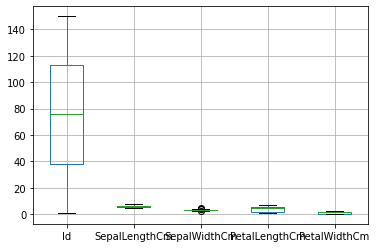

In [6]:
df.boxplot(figsize=(10,7))

<AxesSubplot:>

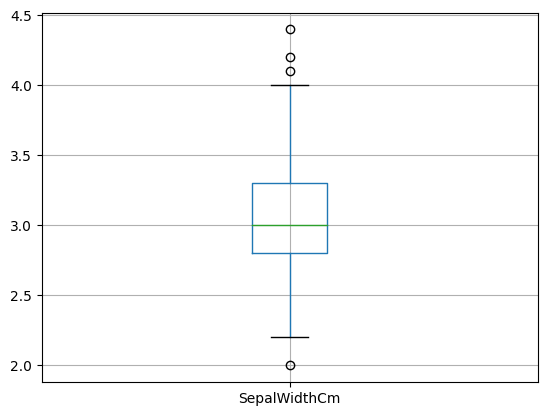

In [7]:
df[["SepalWidthCm"]].boxplot()

In [8]:
q1=df["SepalWidthCm"].quantile(0.25)
q3=df["SepalWidthCm"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [9]:
df[["SepalWidthCm"]].loc[df["SepalWidthCm"]>upper_limit]

,SepalWidthCm
15,4.4
32,4.1
33,4.2


In [10]:
df[["SepalWidthCm"]].loc[df["SepalWidthCm"]<lower_limit]

,SepalWidthCm
60,2.0


In [11]:
df.loc[df["SepalWidthCm"]>upper_limit,"SepalWidthCm"]=upper_limit
df.loc[df["SepalWidthCm"]<lower_limit,"SepalWidthCm"]=lower_limit

<AxesSubplot:>

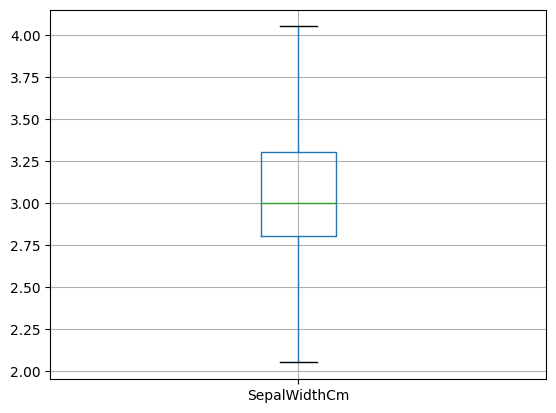

In [12]:
df[["SepalWidthCm"]].boxplot()

### Check variance_inflation_factor

In [13]:
df1=df.drop("Species",axis=1)

<AxesSubplot:>

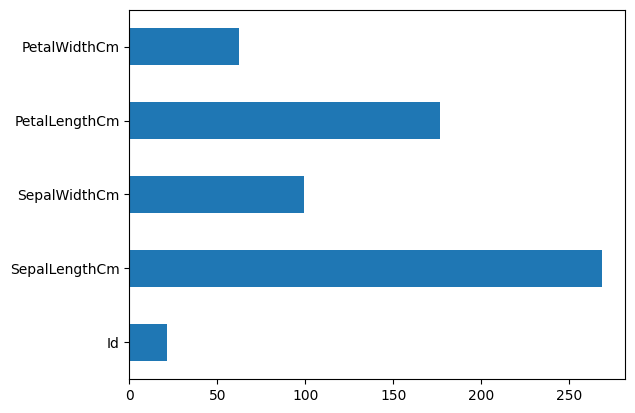

In [14]:
lst=[]
for i in range(df1.shape[1]):
    vif=variance_inflation_factor(df1,i)
    lst.append(vif)
lst
s1=pd.Series(lst,index=df1.columns)
s1.plot(kind="barh")

In [15]:
x=df.drop("Species",axis=1)
y=df["Species"]

### Train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2,stratify=y)

### model_training

In [17]:
logistic_model=LogisticRegression()

In [18]:
logistic_model.fit(x_train,y_train)

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###  prediction

In [19]:
y_pred=logistic_model.predict(x_test)
y_pred_train=logistic_model.predict(x_train)

### probabilities of prediction

In [20]:
y_pred_prob=logistic_model.predict_proba(x_test)
s1=pd.DataFrame((np.around(y_pred_prob,2)),columns=["class_Setosa_test","class_versicolor_test","new_verginica_test"])
y_pred_train_prob=logistic_model.predict_proba(x_train)
s1["predicted"]=y_pred
s1["actual"]=pd.Series(y_test).reset_index(drop=True)
s1.head()


,class_Setosa_test,class_versicolor_test,new_verginica_test,predicted,actual
0,0.01,0.95,0.04,Iris-versicolor,Iris-versicolor
1,0.98,0.02,0.00,Iris-setosa,Iris-setosa
2,0.94,0.06,0.00,Iris-setosa,Iris-setosa
3,1.00,0.00,0.00,Iris-setosa,Iris-setosa
4,0.01,0.96,0.04,Iris-versicolor,Iris-versicolor


In [21]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### confusion_matrix for testing

In [22]:
con_matrix=confusion_matrix(y_pred,y_test)
print("confusion matrix is \n",con_matrix)

confusion matrix is 
 [[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [23]:
classification_report1=classification_report(y_pred,y_test)
print("classification report is \n",classification_report1)

classification report is 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### confusion matrix on training

In [24]:
conf_matrix_train=confusion_matrix(y_pred_train,y_train)
print("confusion matrix for train is \n",conf_matrix_train)

classifcation_report_training=classification_report(y_pred_train,y_train)
print("classification report for training is\n",classifcation_report_training)

confusion matrix for train is 
 [[35  0  0]
 [ 0 35  0]
 [ 0  0 35]]
classification report for training is
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       1.00      1.00      1.00        35
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



### AUC ROC CURVE

In [25]:
#fpr,tpr,thresh=roc_curve(y_train,y_pred_train_prob[:,1])

### USR INPUT

In [26]:
x.head(1).T

,0
Id,1.0
SepalLengthCm,5.1
SepalWidthCm,3.5
PetalLengthCm,1.4
PetalWidthCm,0.2


In [27]:
Id=1.0
SepalLengthCm=5.1
SepalWidthCm=3.5
PetalLengthCm=1.4
PetalWidthCm=0.2

In [28]:
array=np.array([Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm])
array

array([1. , 5.1, 3.5, 1.4, 0.2])

In [29]:
prediction=logistic_model.predict([array])

C:\Program Files\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
prediction[0]
print("type of flower is",prediction[0])

type of flower is Iris-setosa


### pickle files

In [31]:
import pickle
import json
with open("logistic_model_iris.pkl","wb")as f:
    pickle.dump(logistic_model,f)

In [32]:
project_data={"columns":list(x.columns)}

In [34]:
with open("project_data_iris.json","w")as f:
    json.dump(project_data,f)
    